  LSTM (Long Short Term Memory) model using TensorFlow with Keras

In [1]:
#Importing the libraries
import nltk
import pandas as pd
from textblob import Word
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the datasets
data = pd.read_csv('/content/data.csv')


In [3]:
#visualizing the raw data
data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


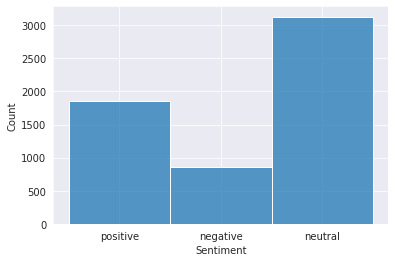

In [4]:
import seaborn as sns
sns.set_style('darkgrid')
sns.histplot(x='Sentiment',data = data)
plt.show()

In [5]:
#Preprocessing the text
def preprocess_text(df, stop_words):
  # Convert all characters to lowercase
  df['Sentence'] = df['Sentence'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
  # Replace digits/numbers with an empty string
  df['Sentence'] = df['Sentence'].str.replace(r'\d+', '')
  # Remove stop words
  df['Sentence'] = df['Sentence'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
  # Perform lemmatization
  nltk.download('wordnet')
  nltk.download('omw-1.4')
  df['Sentence'] = df['Sentence'].apply(lambda x: ' '.join(Word(word).lemmatize() for word in x.split()))
  return df
nltk.download('stopwords')
stop_words = stopwords.words('english')
data_cleaned = preprocess_text(data, stop_words)
data_cleaned




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Sentence,Sentiment
0,geosolutions technology leverage benefon 's gp...,positive
1,"$esi lows, $. $. bk real possibility",negative
2,"last quarter , componenta 's net sale doubled ...",positive
3,"according finnish-russian chamber commerce , m...",neutral
4,swedish buyout firm sold remaining . percent s...,neutral
...,...,...
5837,rising cost forced packaging producer huhtamak...,negative
5838,nordic walking first used summer training meth...,neutral
5839,"according shipping company viking line , eu de...",neutral
5840,"building home improvement trade , sale decreas...",neutral


In [6]:
#Generating Embeddings using tokenizer
# Create a Tokenizer instance with a vocabulary size of 500 and a space character (' ') as the separator to split the text into words
tokenizer = Tokenizer(num_words=500, split=' ') 
#building a vocabulary of 500 most frequent words in the text data
tokenizer.fit_on_texts(data_cleaned['Sentence'].values)
# convert the text samples into sequences
X = tokenizer.texts_to_sequences(data_cleaned['Sentence'].values)
#make all sequences have the same length
X = pad_sequences(X)


In [7]:
#Model Building
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(704, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(352, activation='LeakyReLU'))
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 27, 120)           60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 27, 120)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 704)               2323200   
                                                                 
 dense (Dense)               (None, 352)               248160    
                                                                 
 dense_1 (Dense)             (None, 3)                 1059      
                                                                 
Total params: 2,632,419
Trainable params: 2,632,419
Non-trainable params: 0
______________________________________________